In [14]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split



In [20]:

main_dir = r'F:\5C Network ML Assignment\Data'

# Lists to hold images and masks
images = []
masks = []


for root, dirs, files in os.walk(main_dir):
    for filename in files:

        if filename.endswith('.tif') and 'mask' not in filename:
            img_path = os.path.join(root, filename)


            base_name = filename.split('.tif')[0]  
            mask_filename = f"{base_name}_mask.tif"
            mask_path = os.path.join(root, mask_filename)


            if os.path.exists(mask_path):
                # Read the image and mask files
                image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE) 
                mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE) 

                if image is not None and mask is not None:
                    # Append to lists
                    images.append(image)
                    masks.append(mask)
                else:
                    print(f"Warning: Failed to load image or mask for {filename}")


images = np.array(images)
masks = np.array(masks)

print(f"Loaded {len(images)} images and {len(masks)} masks.")


if len(images) > 0 and len(masks) > 0:
    X_train, X_test, y_train, y_test = train_test_split(images, masks, test_size=0.2, random_state=42)

    print(f"Training set size: {len(X_train)}")
    print(f"Testing set size: {len(X_test)}")

    np.save('X_train.npy', X_train)
    np.save('y_train.npy', y_train)
    np.save('X_test.npy', X_test)
    np.save('y_test.npy', y_test)
else:
    print("No valid images or masks found. Please check the directory structure and file names.")


Loaded 3929 images and 3929 masks.
Training set size: 3143
Testing set size: 786


Searching in: F:\5C Network ML Assignment\Data
Searching in: F:\5C Network ML Assignment\Data\TCGA_CS_4941_19960909
Processed TCGA_CS_4941_19960909_1.tif from F:\5C Network ML Assignment\Data\TCGA_CS_4941_19960909
Processed TCGA_CS_4941_19960909_10.tif from F:\5C Network ML Assignment\Data\TCGA_CS_4941_19960909
Processed TCGA_CS_4941_19960909_10_mask.tif from F:\5C Network ML Assignment\Data\TCGA_CS_4941_19960909
Processed TCGA_CS_4941_19960909_11.tif from F:\5C Network ML Assignment\Data\TCGA_CS_4941_19960909
Processed TCGA_CS_4941_19960909_11_mask.tif from F:\5C Network ML Assignment\Data\TCGA_CS_4941_19960909
Processed TCGA_CS_4941_19960909_12.tif from F:\5C Network ML Assignment\Data\TCGA_CS_4941_19960909
Processed TCGA_CS_4941_19960909_12_mask.tif from F:\5C Network ML Assignment\Data\TCGA_CS_4941_19960909
Processed TCGA_CS_4941_19960909_13.tif from F:\5C Network ML Assignment\Data\TCGA_CS_4941_19960909
Processed TCGA_CS_4941_19960909_13_mask.tif from F:\5C Network ML Assignment\D

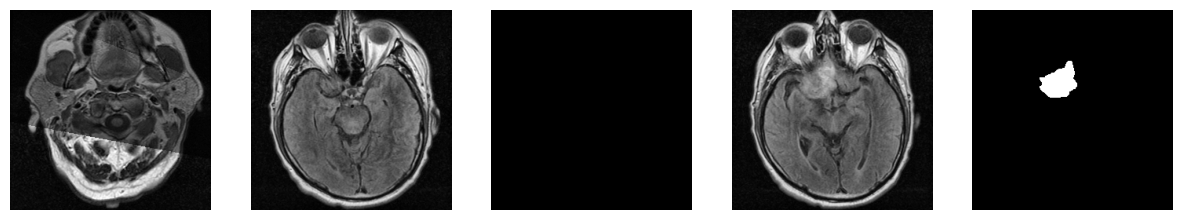

In [23]:
import matplotlib.pyplot as plt

def apply_clahe(image):
    """Apply CLAHE (Contrast Limited Adaptive Histogram Equalization) to an image."""

    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    

    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced_image = clahe.apply(image)
    
    return enhanced_image

def process_images_in_subfolders(main_folder_path):
    """Process all images in subfolders using CLAHE."""
    processed_images = []
    
    for dirpath, dirnames, filenames in os.walk(main_folder_path):
        print(f"Searching in: {dirpath}")  
        for filename in filenames:
            if filename.endswith('.tif'):
                img_path = os.path.join(dirpath, filename)
                image = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)  
                
                if image is not None:  
                    enhanced_image = apply_clahe(image)  
                    processed_images.append(enhanced_image)
                    print(f"Processed {filename} from {dirpath}")  
                else:
                    print(f"Failed to read {filename} from {dirpath}") 

    return processed_images


main_folder_path = r'F:\5C Network ML Assignment\Data' 
processed_images = process_images_in_subfolders(main_folder_path)


if processed_images:
    plt.figure(figsize=(15, 5))
    for i in range(min(5, len(processed_images))): 
        plt.subplot(1, 5, i + 1)
        plt.imshow(processed_images[i], cmap='gray')
        plt.axis('off')
    plt.show()
else:
    print("No images processed.")


In [24]:
def save_processed_images(processed_images, output_folder):
    """Save processed images to the specified output folder."""
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)  

    for i, image in enumerate(processed_images):

        output_filename = f"processed_image_{i + 1}.tif"  
        output_path = os.path.join(output_folder, output_filename)
        cv2.imwrite(output_path, image) 
        print(f"Saved processed image to {output_path}")


output_folder_path = r'F:\5C Network ML Assignment\Processed_Images' 
save_processed_images(processed_images, output_folder_path)


Saved processed image to F:\5C Network ML Assignment\Processed_Images\processed_image_1.tif
Saved processed image to F:\5C Network ML Assignment\Processed_Images\processed_image_2.tif
Saved processed image to F:\5C Network ML Assignment\Processed_Images\processed_image_3.tif
Saved processed image to F:\5C Network ML Assignment\Processed_Images\processed_image_4.tif
Saved processed image to F:\5C Network ML Assignment\Processed_Images\processed_image_5.tif
Saved processed image to F:\5C Network ML Assignment\Processed_Images\processed_image_6.tif
Saved processed image to F:\5C Network ML Assignment\Processed_Images\processed_image_7.tif
Saved processed image to F:\5C Network ML Assignment\Processed_Images\processed_image_8.tif
Saved processed image to F:\5C Network ML Assignment\Processed_Images\processed_image_9.tif
Saved processed image to F:\5C Network ML Assignment\Processed_Images\processed_image_10.tif
Saved processed image to F:\5C Network ML Assignment\Processed_Images\processed

In [28]:
pip install imgaug


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
from imgaug import augmenters as iaa

def normalize_image(image):
    """Normalize the image pixel values to the range [0, 1]."""
    normalized_image = cv2.normalize(image, None, alpha=0, beta=1, 
                                     norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    return normalized_image

def augment_image(image):
    """Apply data augmentation to the input image."""
    aug = iaa.Sequential([
        iaa.Fliplr(0.5),   # Horizontally flip 50% of the images
        iaa.Affine(rotate=(-20, 20)),  # Random rotations between -20 to 20 degrees
        iaa.AdditiveGaussianNoise(scale=(0, 0.05*255)),  # Add Gaussian noise
        iaa.Multiply((0.8, 1.2)),  # Random brightness adjustment
        iaa.Crop(percent=(0, 0.1))  # Randomly crop the images
    ])
    
    augmented_image = aug(image=image)
    return augmented_image

def process_and_augment_images(folder_path, output_path):
    """Process all images in the folder by normalizing and applying augmentation."""
    if not os.path.exists(output_path):
        os.makedirs(output_path)
    
    processed_count = 0
    for foldername in os.listdir(folder_path):
        subfolder_path = os.path.join(folder_path, foldername)
        if os.path.isdir(subfolder_path):
            for filename in os.listdir(subfolder_path):
                if filename.endswith('.tif'):
                    img_path = os.path.join(subfolder_path, filename)
                    image = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)

                    normalized_image = normalize_image(image)
                    
                    augmented_image = augment_image(normalized_image)
                    
    
                    save_path = os.path.join(output_path, f"augmented_{processed_count}.tif")
                    cv2.imwrite(save_path, augmented_image)
                    print(f"Saved augmented image to {save_path}")
                    processed_count += 1

# Example usage
data_folder = r"F:\5C Network ML Assignment\Data"
augmented_output_folder = r"F:\5C Network ML Assignment\Augmented_Images"
process_and_augment_images(data_folder, augmented_output_folder)


Saved augmented image to F:\5C Network ML Assignment\Augmented_Images\augmented_0.tif
Saved augmented image to F:\5C Network ML Assignment\Augmented_Images\augmented_1.tif
Saved augmented image to F:\5C Network ML Assignment\Augmented_Images\augmented_2.tif
Saved augmented image to F:\5C Network ML Assignment\Augmented_Images\augmented_3.tif
Saved augmented image to F:\5C Network ML Assignment\Augmented_Images\augmented_4.tif
Saved augmented image to F:\5C Network ML Assignment\Augmented_Images\augmented_5.tif
Saved augmented image to F:\5C Network ML Assignment\Augmented_Images\augmented_6.tif
Saved augmented image to F:\5C Network ML Assignment\Augmented_Images\augmented_7.tif
Saved augmented image to F:\5C Network ML Assignment\Augmented_Images\augmented_8.tif
Saved augmented image to F:\5C Network ML Assignment\Augmented_Images\augmented_9.tif
Saved augmented image to F:\5C Network ML Assignment\Augmented_Images\augmented_10.tif
Saved augmented image to F:\5C Network ML Assignment\

In [ ]:
pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

def nested_unet(input_shape):
    inputs = layers.Input(shape=input_shape)

    conv1 = layers.Conv2D(64, 3, padding='same')(inputs)
    conv1 = layers.BatchNormalization()(conv1)
    conv1 = layers.Activation('relu')(conv1)

    conv1_1 = layers.Conv2D(64, 3, padding='same')(conv1)
    conv1_1 = layers.BatchNormalization()(conv1_1)
    conv1_1 = layers.Activation('relu')(conv1_1)

    pool1 = layers.MaxPooling2D((2, 2))(conv1_1)

    conv2 = layers.Conv2D(128, 3, padding='same')(pool1)
    conv2 = layers.BatchNormalization()(conv2)
    conv2 = layers.Activation('relu')(conv2)

    conv2_1 = layers.Conv2D(128, 3, padding='same')(conv2)
    conv2_1 = layers.BatchNormalization()(conv2_1)
    conv2_1 = layers.Activation('relu')(conv2_1)

    pool2 = layers.MaxPooling2D((2, 2))(conv2_1)


    up1 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(pool2)
    concat1 = layers.concatenate([up1, conv1_1], axis=-1)

    conv3 = layers.Conv2D(64, 3, padding='same')(concat1)
    conv3 = layers.BatchNormalization()(conv3)
    conv3 = layers.Activation('relu')(conv3)

    outputs = layers.Conv2D(1, 1, activation='sigmoid')(conv3)

    model = models.Model(inputs=[inputs], outputs=[outputs])
    return model

input_shape = (256, 256, 1)  
nested_unet_model = nested_unet(input_shape)
nested_unet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

def attention_unet(input_shape):
    inputs = layers.Input(shape=input_shape)


    conv1 = layers.Conv2D(64, 3, padding='same')(inputs)
    conv1 = layers.BatchNormalization()(conv1)
    conv1 = layers.Activation('relu')(conv1)

    pool1 = layers.MaxPooling2D((2, 2))(conv1)

    conv2 = layers.Conv2D(128, 3, padding='same')(pool1)
    conv2 = layers.BatchNormalization()(conv2)
    conv2 = layers.Activation('relu')(conv2)

    pool2 = layers.MaxPooling2D((2, 2))(conv2)

    up1 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(pool2)

    attention = layers.Conv2D(64, (1, 1))(conv1)
    attention = layers.BatchNormalization()(attention)
    attention = layers.Activation('sigmoid')(attention)

    concat1 = layers.multiply([up1, attention])

    conv3 = layers.Conv2D(64, 3, padding='same')(concat1)
    conv3 = layers.BatchNormalization()(conv3)
    conv3 = layers.Activation('relu')(conv3)

    outputs = layers.Conv2D(1, 1, activation='sigmoid')(conv3)

    model = models.Model(inputs=[inputs], outputs=[outputs])
    return model

attention_unet_model = attention_unet(input_shape)
attention_unet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
